In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root = 'data/',download = True)

In [7]:
dataset.shape

AttributeError: 'MNIST' object has no attribute 'shape'

In [4]:
test_dataset = MNIST(root = 'data/',train = False)

In [6]:
len(test_dataset)

10000

In [7]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [7]:
# Let's see the image
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [9]:
image, label = dataset[0]

Label:  5


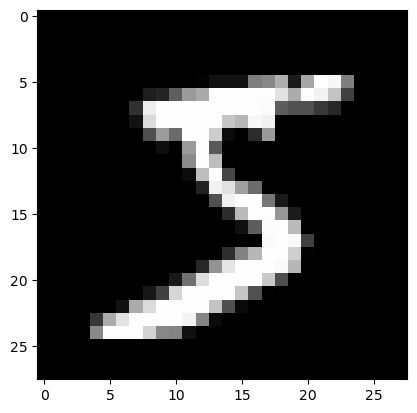

In [10]:
plt.imshow(image,cmap = 'grey')
print('Label: ',label)

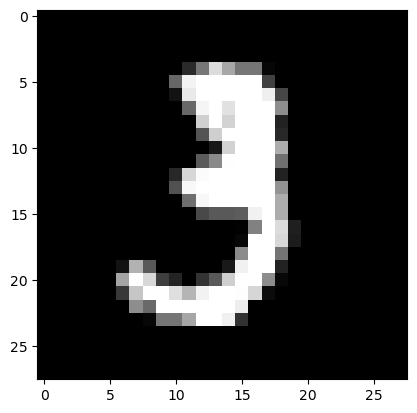

In [11]:
image, label = dataset[10]
plt.imshow(image, cmap = 'grey')

Label : 7


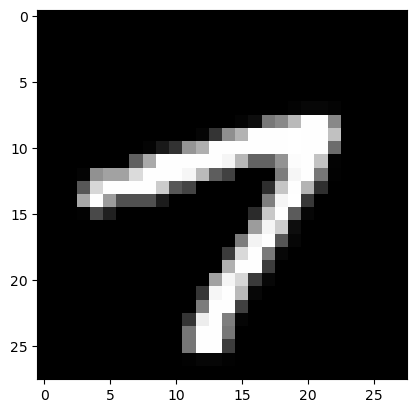

In [14]:
image, label = dataset[101]
plt.imshow(image, cmap = 'grey')
print('Label :',label)

In [5]:
import torchvision.transforms as transforms

In [6]:
dataset = MNIST(root = 'data/',train = True,transform = transforms.ToTensor())

In [14]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [15]:
# Now image is converted into tensor 
img_tensor, label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


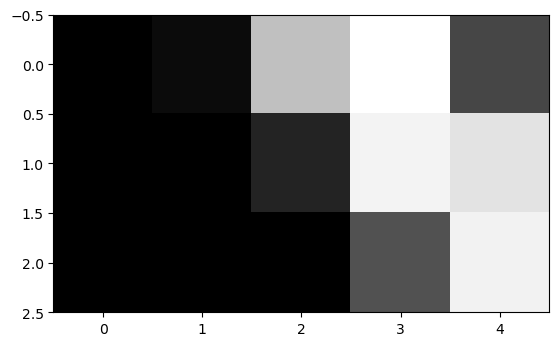

In [16]:
plt.imshow(img_tensor[0,12:15,10:15], cmap = 'grey')

## training and validation set

In [17]:
from torch.utils.data import random_split

In [18]:
train_ds,val_ds = random_split(dataset,[50000,10000])

In [19]:
len(train_ds)

50000

In [29]:
from torch.utils.data import DataLoader

batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle = True,num_workers = 4,pin_memory = True)
val_loader = DataLoader(val_ds,batch_size*2,num_workers = 4, pin_memory = True)

In [30]:
len(train_loader)

391

In [31]:
for image,label in train_loader:
    print(label)
    print(image.shape)
    break

tensor([0, 2, 3, 3, 4, 8, 0, 8, 9, 7, 2, 1, 2, 3, 3, 0, 8, 7, 1, 5, 7, 3, 2, 9,
        7, 4, 2, 3, 3, 0, 8, 5, 7, 5, 0, 1, 3, 7, 3, 1, 3, 3, 5, 0, 0, 4, 4, 2,
        1, 3, 7, 0, 4, 3, 3, 7, 8, 9, 1, 8, 3, 5, 0, 7, 6, 2, 2, 3, 1, 4, 0, 5,
        0, 1, 9, 9, 3, 1, 4, 5, 3, 9, 1, 9, 6, 5, 4, 1, 3, 8, 8, 7, 6, 7, 3, 2,
        7, 0, 1, 6, 6, 1, 6, 3, 3, 2, 0, 9, 4, 5, 4, 9, 2, 7, 9, 3, 0, 5, 9, 0,
        2, 3, 1, 3, 4, 0, 5, 9])
torch.Size([128, 1, 28, 28])


In [23]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

model = nn.Linear(input_size, num_classes)



In [24]:
print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [25]:
## Now our model is ready but there is problem here in our model the shape of 
## our input is not same as our weight.
model.weight

Parameter containing:
tensor([[-0.0106, -0.0337, -0.0324,  ..., -0.0217, -0.0022, -0.0214],
        [-0.0205, -0.0134, -0.0094,  ..., -0.0303, -0.0011,  0.0319],
        [-0.0296, -0.0327,  0.0138,  ...,  0.0065,  0.0303,  0.0077],
        ...,
        [ 0.0229,  0.0143, -0.0139,  ...,  0.0319, -0.0230, -0.0191],
        [-0.0033, -0.0152, -0.0218,  ..., -0.0177,  0.0254, -0.0340],
        [ 0.0072, -0.0184, -0.0160,  ..., -0.0133,  0.0172, -0.0271]],
       requires_grad=True)

In [26]:
model.bias

Parameter containing:
tensor([-0.0146,  0.0251,  0.0133, -0.0051,  0.0200, -0.0141, -0.0062,  0.0314,
        -0.0009, -0.0313], requires_grad=True)

In [27]:
##  we can reshape our input shape using our nn module class.

class MnistModel(nn.Module): ## Parent class
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
        

In [28]:
model = MnistModel()

In [41]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 2.8523e-02,  2.8170e-02,  1.0550e-02,  ...,  3.0160e-02,
          -6.3606e-03, -3.1060e-02],
         [ 1.4997e-02,  2.0765e-02, -1.5786e-02,  ..., -4.6005e-04,
           2.0530e-02,  1.6066e-02],
         [ 1.8166e-02, -5.0951e-03,  1.9009e-02,  ...,  2.6066e-02,
           2.5955e-02,  1.1712e-02],
         ...,
         [ 2.6619e-02, -8.2798e-03,  1.1251e-02,  ..., -1.3967e-02,
           3.3198e-02,  1.3796e-02],
         [ 1.1304e-02,  3.5986e-06, -1.9038e-02,  ..., -2.6543e-02,
           1.8818e-03, -3.3369e-02],
         [-1.3972e-02, -8.2500e-03, -2.9515e-02,  ..., -2.2299e-02,
           8.9099e-03, -3.5687e-02]], requires_grad=True),
 Parameter containing:
 tensor([-0.0155, -0.0219, -0.0158,  0.0270, -0.0017,  0.0307, -0.0322,  0.0265,
         -0.0068,  0.0240], requires_grad=True)]

In [42]:
for image, label in train_loader:
    output = model(image)
    break

print('output.shape :',output.shape)
print('Sample outputs :\n',output)

output.shape : torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0099,  0.0633, -0.1288,  ..., -0.2166, -0.1283, -0.1275],
        [ 0.0695, -0.0263, -0.0510,  ..., -0.1774, -0.1730,  0.1361],
        [-0.0088,  0.0885,  0.0172,  ..., -0.4719, -0.3629, -0.0442],
        ...,
        [-0.1545, -0.2493, -0.1331,  ..., -0.4206,  0.0514, -0.0269],
        [-0.1595,  0.0098,  0.1119,  ..., -0.0859, -0.1322, -0.0924],
        [-0.0721, -0.1676, -0.0106,  ..., -0.0317,  0.1513,  0.0149]],
       grad_fn=<AddmmBackward0>)


In [43]:
import torch.nn.functional as F

In [44]:
prob = F.softmax(output, dim = 1)

In [45]:
prob

tensor([[0.1038, 0.1095, 0.0903,  ..., 0.0827, 0.0904, 0.0905],
        [0.1049, 0.0953, 0.0930,  ..., 0.0819, 0.0823, 0.1121],
        [0.1010, 0.1113, 0.1036,  ..., 0.0635, 0.0709, 0.0975],
        ...,
        [0.0838, 0.0762, 0.0856,  ..., 0.0642, 0.1030, 0.0952],
        [0.0762, 0.0903, 0.1000,  ..., 0.0820, 0.0783, 0.0815],
        [0.0935, 0.0850, 0.0995,  ..., 0.0974, 0.1169, 0.1020]],
       grad_fn=<SoftmaxBackward0>)

In [46]:
print(torch.sum(prob[0]).item())

0.9999999403953552


In [47]:
max_prob, pred = torch.max(prob,dim = 1)
print(pred)
print(max_prob)

tensor([5, 5, 5, 3, 3, 6, 5, 6, 6, 5, 5, 6, 6, 5, 8, 2, 6, 6, 5, 5, 5, 3, 5, 5,
        5, 5, 5, 5, 6, 5, 5, 9, 6, 6, 0, 7, 5, 6, 7, 5, 5, 5, 7, 3, 3, 5, 6, 5,
        5, 5, 5, 5, 5, 3, 3, 7, 3, 5, 5, 3, 6, 3, 6, 2, 7, 5, 6, 6, 5, 5, 5, 3,
        5, 5, 8, 6, 5, 5, 5, 6, 5, 5, 5, 5, 4, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 8, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 1, 5, 5, 5, 5, 3, 5, 5,
        5, 1, 5, 5, 5, 5, 3, 8])
tensor([0.1465, 0.1479, 0.1478, 0.1392, 0.1232, 0.1223, 0.1692, 0.1296, 0.1186,
        0.1490, 0.1500, 0.1197, 0.1507, 0.1693, 0.1231, 0.1325, 0.1311, 0.1446,
        0.1830, 0.1437, 0.1382, 0.1316, 0.1473, 0.1440, 0.1205, 0.1306, 0.1476,
        0.1238, 0.1526, 0.1691, 0.1525, 0.1129, 0.1579, 0.1333, 0.1102, 0.1166,
        0.1691, 0.1259, 0.1257, 0.2157, 0.1391, 0.1310, 0.1224, 0.1331, 0.1197,
        0.1658, 0.1244, 0.1271, 0.1484, 0.2001, 0.1231, 0.1306, 0.1296, 0.1274,
        0.1187, 0.1111, 0.1411, 0.1343, 0.1453, 0.1230, 0.1293, 0.1192, 0.1073,
       

In [48]:
label

tensor([6, 0, 0, 4, 4, 1, 0, 1, 1, 4, 3, 1, 8, 0, 9, 7, 4, 4, 5, 0, 8, 9, 8, 0,
        5, 2, 2, 2, 8, 6, 6, 2, 8, 1, 2, 8, 6, 1, 4, 0, 8, 9, 9, 7, 1, 3, 7, 9,
        3, 0, 4, 3, 6, 2, 9, 1, 4, 9, 5, 9, 1, 4, 1, 5, 3, 6, 3, 4, 4, 2, 2, 7,
        6, 5, 1, 7, 0, 6, 4, 1, 1, 8, 1, 9, 5, 1, 4, 5, 2, 2, 2, 0, 7, 5, 0, 3,
        6, 0, 1, 2, 6, 9, 6, 6, 8, 0, 1, 8, 5, 6, 6, 6, 5, 3, 2, 7, 1, 4, 1, 9,
        3, 5, 8, 3, 2, 0, 9, 9])

In [51]:
# Evaluation metric and loss function
def accuracy(output,label):
    _, pred = torch.max(output, dim = 1)
    return torch.tensor(torch.sum(pred==label).item()/len(pred))

In [52]:
accuracy(output,label)

tensor(0.0547)

## Evaluating metric and loss function

In [53]:
loss_fn = F.cross_entropy

In [54]:
loss = loss_fn(output,label)
print(loss)

tensor(2.3440, grad_fn=<NllLossBackward0>)


In [78]:
## training the model

def fit(epochs, lr, model, train_loader,val_loader,opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(),lr)
    history = []
    for epoch in range(epochs):
        # Training phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model,val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history     

In [79]:
def evaluate(model, val_loader):
    output = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(output)

In [59]:
for batch in train_loader:
    print(batch)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
## finally let's redefine the Mnist Model class to include additional methods
## training step, validation step, validation epochs end and epoch end used fit and evaluate

In [80]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
        
    def training_step(self,batch):
        image, label = batch
        out = self(image)
        loss = F.cross_entropy(out, label)
        return loss
        
    def validation_step(self, batch):
        image, label = batch
        out = self(image)
        loss = F.cross_entropy(out, label)
        acc = accuracy(out, label)
        return {'val_loss':loss,'val_acc':acc}
        
    def validation_epoch_end(self,output):
        batch_losses = [x['val_loss'] for x in output]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_acc = [x['val_acc'] for x in output]
        epoch_acc = torch.stack(batch_acc).mean()
        return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}
        
    def epoch_end(self,epoch,result):
        print("Epoch[{}],val_loss:{:.4f},val_acc':{:.4f}".format(epoch,result['val_loss'],result['val_acc']))

In [75]:
model = MnistModel()

In [76]:
result0 = evaluate(model,val_loader)
result0

{'val_loss': 2.3354547023773193, 'val_acc': 0.048259492963552475}

In [81]:
history1 = fit(5,0.001,model,train_loader,val_loader)

Epoch[0],val_loss:1.9594,val_acc':0.6380
Epoch[1],val_loss:1.6844,val_acc':0.7434
Epoch[2],val_loss:1.4799,val_acc':0.7761
Epoch[3],val_loss:1.3263,val_acc':0.7919
Epoch[4],val_loss:1.2085,val_acc':0.8028


In [82]:
history2 = fit(5,0.001,model,train_loader,val_loader)

Epoch[0],val_loss:1.1161,val_acc':0.8117
Epoch[1],val_loss:1.0420,val_acc':0.8195
Epoch[2],val_loss:0.9815,val_acc':0.8255
Epoch[3],val_loss:0.9311,val_acc':0.8302
Epoch[4],val_loss:0.8887,val_acc':0.8342


In [83]:
history3 = fit(5,0.001,model,train_loader,val_loader)

Epoch[0],val_loss:0.8522,val_acc':0.8375
Epoch[1],val_loss:0.8207,val_acc':0.8420
Epoch[2],val_loss:0.7931,val_acc':0.8446
Epoch[3],val_loss:0.7688,val_acc':0.8464
Epoch[4],val_loss:0.7470,val_acc':0.8491


In [84]:
history4 = fit(5,0.001,model,train_loader,val_loader)

Epoch[0],val_loss:0.7276,val_acc':0.8505
Epoch[1],val_loss:0.7100,val_acc':0.8521
Epoch[2],val_loss:0.6941,val_acc':0.8540
Epoch[3],val_loss:0.6795,val_acc':0.8555
Epoch[4],val_loss:0.6662,val_acc':0.8580


In [85]:
history5 = fit(5,0.001,model,train_loader,val_loader)

Epoch[0],val_loss:0.6539,val_acc':0.8600
Epoch[1],val_loss:0.6426,val_acc':0.8614
Epoch[2],val_loss:0.6320,val_acc':0.8628
Epoch[3],val_loss:0.6222,val_acc':0.8650
Epoch[4],val_loss:0.6131,val_acc':0.8664


Text(0.5, 1.0, 'Accuracy vs No of epochs')

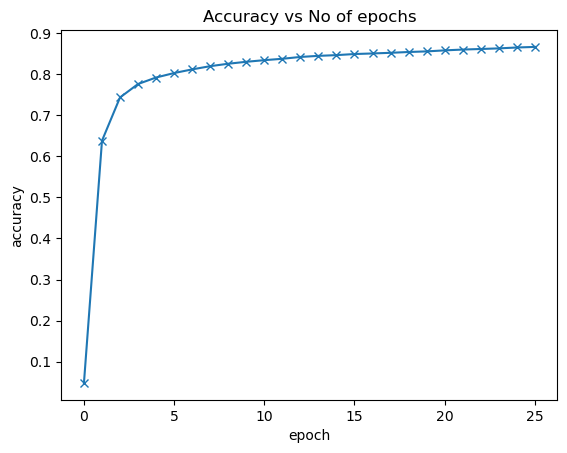

In [86]:
## let's visualize accuracy vs No. of epochs graph
history = [result0] + history1 + history2 + history3 + history4 + history5
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No of epochs')

## testing with individual images